In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import os
from tqdm.notebook import tqdm

In [2]:
def make_graph(l, inv_ks,vlen=100):
    vn = np.einsum('i,j->ij', inv_ks, np.arange(vlen)**2)
    graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,vn.astype(np.float32))
    return graph

In [3]:
inv_ks = np.linspace(0.1,1.0,64)

In [4]:
graph = make_graph(8, inv_ks)
graph.simulate(steps=100,local_updates_per_step=10)
w_v = graph.simulate_and_get_winding_variance(1000,local_updates_per_step=10,steps_per_sample=100)

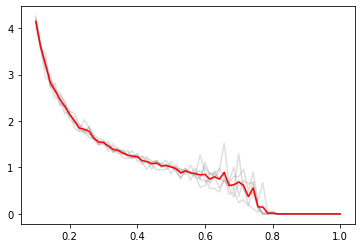

In [5]:
for i in range(w_v.shape[-1]):
    plt.plot(inv_ks, w_v[:,i], c='gray', alpha=0.25)

plt.plot(inv_ks, w_v.mean(axis=-1), c='red')

In [6]:
graph = make_graph(8, inv_ks)
graph.simulate(steps=100,local_updates_per_step=10,run_parallel_tempering=True)
w_v_par = graph.simulate_and_get_winding_variance(1000,local_updates_per_step=10,steps_per_sample=100,run_parallel_tempering=True)

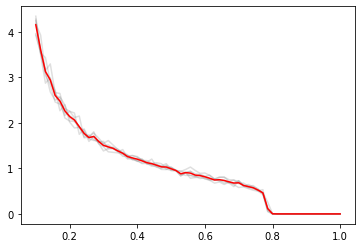

In [7]:
for i in range(w_v_par.shape[-1]):
    plt.plot(inv_ks, w_v_par[:,i], c='gray', alpha=0.25)

plt.plot(inv_ks, w_v_par.mean(axis=-1), c='red')

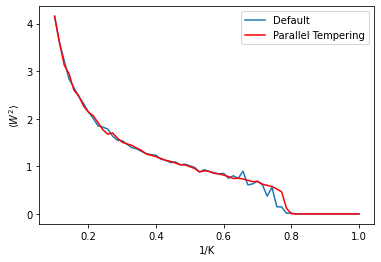

In [12]:
plt.plot(inv_ks, w_v.mean(axis=-1), label='Default')
plt.plot(inv_ks, w_v_par.mean(axis=-1), c='red', label='Parallel Tempering')

plt.xlabel('1/K')
plt.ylabel(r'$\langle W^2 \rangle$')
plt.legend()
plt.show()

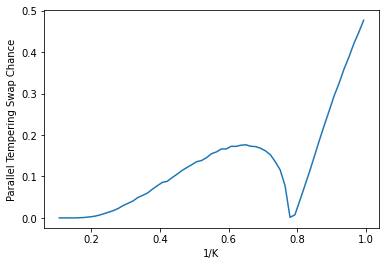

In [15]:
plt.plot((inv_ks[:-1] + inv_ks[1:]) / 2.0, graph.get_parallel_tempering_success_rate())
plt.xlabel('1/K')
plt.ylabel('Parallel Tempering Swap Chance')
plt.show()